# Big Data in Finance: Part II <BR><BR> Lecture Notes 5: Factor Investing 
    
**Instructor** <BR>
Kirsten Burr, kburr26@gsb.columbia.edu
    
**TA's:** <BR>
Meha Sadasivam, MSadasivam21@gsb.columbia.edu <BR>
Daheng Yang, dyang22@gsb.columbia.edu
    
<sub> Credit: lecture notes originally developed by Lira Mota

## What have we covered?

1. Overview of CRSP
2. Overview of Compustat
3. Merge CRSP and Compustat
4. Characteristics needed for Fama and French 5-Factor Model (FF5)

## Today's Objectives

1. Review the MVE, CAPM, and building factor models
2. Construct FF5 characteristic-sorted portfolios
3. Study the mom vs. short-term reversal strategies
4. Fama-MacBeth regressions
5. Alpha evaluation
6. Homework: Momentum 

## Mean Variance Efficient (MVE) Portfolio

### What is the mean-variance efficient (MVE) portfolio?
* A key concept in asset pricing is the mean-variance efficient portfolio
(MVE)
* A MVE portfolio is a zero-investment portfolio that gives
    * the maximum possible expected excess return for any level of variance
    * the minimum possible variance for any expected excess return
* An investor with mean-variance preferences will always hold this portfolio
    * An investor with other preferences will generally hold this portfolio along with hedging portfolios [(Merton 1971)](https://www.sciencedirect.com/science/article/pii/002205317190038X)

### What are the portfolio weights for the MVE portfolio?
Given the vector of expected excess returns for a set of assets $(\bar\mu)$ and the covariance matrix of excess returns $(\bar\sigma)$, we can determine the vector of MVE portfolio weights on each asset $\omega^*_{MVE}$.
$$
\begin{aligned}
    \max_{\omega} E[r_p] &= \omega^{\prime} \mu \quad s.t. \ \sigma_p^2 = \omega^{\prime} \sum \omega\\\\
    \implies \mathscr L &=\omega^{\prime} \mu-\frac{\lambda}{2}\left(\omega^{\prime} \sum \omega-\sigma_p^2\right)\\
    \text{FOC: } \frac{\partial \mathscr{L}}{\partial \omega^{\prime}}&=\mu-\lambda \Sigma \omega 
\end{aligned} 
$$
where the last line must be equal to zero when $\omega = \omega^*_{MVE}$.
$$
\begin{aligned}
    \implies \omega^*_{MVE} = \frac{1}{\lambda}\Sigma^{-1}\mu\\
    \implies E[r_{MVE}] = \omega^{*\prime}_{MVE}\mu
\end{aligned} 
$$

### The Capital Market Line (CML)
The CML represents portfolios that optimally combine risk and return, where the measure of risk is the standard deviation of returns (total risk) and investors can borrow/lend at the risk-free rate of return.  

<table><tr><td><img src="./mve/efficient frontier.png" width="600" height="300"/></td></tr></table>

### The Efficicent Frontier
The mean-variance efficient frontier represents all portfolios of *risky* securities (like stocks) with the maximum return for each level of volatility. 

<table><tr><td><img src="./mve/efficient frontier.png" width="300" height="150" align="center"/></td></tr></table>

* Portfolios outside the frontier are infeasible (not possible to get this return with volatility this low).
* Portfolios inside the frontier are feasible but inefficient (its always possible to achieve these returns while taking on less risk).

* The CML differs from the efficient frontier in that it includes risk-free investments. 
* The intercept point of CML and efficient frontier would result in the most efficient portfolio, called the *tangency portfolio*.

### The Security Market Line (SML)
The SML is derived from the CML, and, given the return and volatility of the MVE at any given point in time, it shows the systematic risk of individual shows the expected returns of individual assets.
<table><tr><td><img src="./mve/CML.png" width="600" height="300"></td><td><img src="./mve/SML.png" width="600" height="300"></td></tr></table>

#### Deriving the SML
A property of the MVE is that its covariance with every asset is proportional to the asset's expected return.
$$
\begin{aligned}
\operatorname{cov}(r, r_{MVE}) &= \Sigma \omega_{MVE}\\
&= \frac{1}{\lambda}\Sigma\Sigma^{-1}\mu = \frac{1}{\lambda}\mu\\
\implies \mu &= \lambda\operatorname{cov}(r, r_{MVE})
\end{aligned}
$$
And, since this must hold for the MVE portfolio as well, we have 
$$
\begin{aligned}
\mu_{MVE} &= \lambda\operatorname{cov}(r_{MVE}, r_{MVE}) = \sigma^2_{MVE}\\
\implies \lambda &= \frac{\mu_{MVE}}{\sigma^2_{MVE}} = \frac{\mu}{\operatorname{cov}(r, r_{MVE})}\\
\implies \mu &= \frac{\operatorname{cov}(r, r_{MVE})}{\sigma^2_{MVE}}\mu_{MVE} \equiv \beta \mu_{MVE}
\end{aligned}
$$

#### Plotting the SML
For each asset return, we can plot them based upon their covariance with the MVE portfolio (i.e. beta or systematic risk):
<table><tr><td><img src="./mve/SML.png" width="500" height="250"></td></tr></table>

* Similarly to the CML, securities that are fairly priced will plot on the SML.
* Securities above the SML are generating returns that are too high for the given risk (underpriced). 
* Securities below the SML are generating returns that are too low for the given risk (overpriced).

### Testing the Market Portfolio
Because the covariance of every asset with the MVE is proportional to the asset's expected return, this relationship means the we can test whether a given portfolio is MVE by testing whether there exists a portfolio for which the expected return doesn’t line up with its beta.

#### CAPM 
* If we believe that all investors in the market are mean-variance efficient, then we can say under some additional assumptions that the market portfolio is MVE.
    * And all MVE investors will choose a position on the capital market line, in equilibrium, by borrowing or lending at the risk-free rate, since this maximizes return for a given level of risk.
    * This is the **capital asset pricing model (CAPM)**, the first pricing model to come out of modern finance. 

* According to the CAPM:
$$ 
E[r] = \beta E[r_{mkt}]
$$
where 

$r=$ vector of excess returns, 

$r_{mkt}=$ vector of the market portfolios returns, and 
$\beta= \frac{\operatorname {cov} (\tilde r, \tilde r_{mkt})}{\sigma_{mkt}^2} =$ projection (regression) coefficients for
$$\tilde r = \alpha + \beta \tilde r_{mkt} + \tilde \epsilon$$

- Notice: If the market is MVE, then
    - $E[r] = \beta E[r_{mkt}]$
    - Thus, $\alpha = 0$
    - Again, this holds if and only if the market is MVE.
- Thus, we can test whether the market is MVE by trying to find a portfolio that generates $\alpha \neq 0$.

- If we find that the market isn't MVE, what do we do?

- We create new "factors" where the MVE portfolio will be in the span of the resulting factor portfolios.

## Traded Factor Portfolios

### What are Traded factor portfolios?
* Traded factor portfolios are long-short portfolios that capture the common influence of some source of risk. 
* They are zero-investment portfolios, meaning they are fully self-financing. 
* By borrowing and short selling some securities, the long position in other securities is fully financed with no additional investment required.

### How do we build traded factor portfolios?
- Sort all stocks on the characteristic (e.g. book-to-market),
- Then take the the highest B/M stocks and go long and take the lowest B/M stocks and go short.
- How do we know how high is highest and low is lowest? 
    - Breakpoints
    - Using the breakpoints of Fama and French, we cut off highest at 70%ile and lowest at 30%ile


### Testing traded factor portfolios 
If we run the regression of a long-short portfolio of stocks that were sorted on some characteristic (eg. B/M) on the market and see a positive alpha,    
    $$
    HML_t = \alpha + \beta (R_{mkt}-r_f) + \epsilon_t
    $$
- then it must be that the market is not MVE, meaning there is some return from the portfolio that is orthogonal to that of the market.
- We can build a fully self financed portfolio that goes long high B/M stocks and short low B/M stocks to gain to capture the common return from that source of risk.
- Thus, a mean-variance investor should always hold some combination of these portfolios.
    - And that combination is found by using the $\omega^*_{MVE}$ formula.

## ... and the Cross-Section of Expected Returns

* [Harvey, Liu and Zhu (RFS, 2016)](https://academic.oup.com/rfs/article/29/1/5/1843824)
    * "Hundreds of papers and factors attempt to explain the cross-section of expected returns." 
    * They [list 313 papers](http://faculty.fuqua.duke.edu/~charvey/Factor-List.xlsx) published in a selection of journals that study cross-sectional return patterns.
* The majority of those papers follow: 
    1. We show that stocks with high value of x on average outperform stocks with low value of x.
    2. Is it robust? Run a Fama-MacBeth regression;
    3. Is it explained by risk? Form a long-short portfolio based on the new characteristic sort. Test if this portfolio earns an "alpha" with respect the benchmark model.

## Set Up

In [1]:
#%% Packages 
import sys
import pandas as pd
import numpy as np
import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 6]
idx = pd.IndexSlice

**(FI)nance (RE)search Python Tools: fire_pytools**

* To make our lives easier, we will use a fire_pytools package.
* Written by our alumni, Lira Mota
    - Download the package [here](https://bitbucket.org/liramota/fire_pytools/src)
* This is a collection of useful functions in finance research.
    - Direct download of CRSP and Compustat from WRDS server
    - Direct download of Ken French data library
    - Portfolio sorts tools
    - Replicate Fama and French factors

In [2]:
# Packages from fire_pytools
sys.path.append("../fire_pytools") 

# Data Import
from data_setup import stock_monthly
from data_setup import stock_annual

# Functions 
from utils.monthly_date import *
from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios
from import_kf.kf_factors import *

## Download Data

In [3]:
# mdata = stock_monthly.main()
# mdata.to_pickle(path = '../stock_monthly.pkl')
mdata = pd.read_pickle('../stock_monthly.pkl')
mdata.columns

Index(['permno', 'date', 'dlret', 'dlretx', 'exchcd', 'naics', 'permco', 'prc',
       'ret', 'shrcd', 'shrout', 'siccd', 'ticker', 'rankyear', 'retadj', 'me',
       'lag_me', 'lag_dlret', 'melag_weights', 'mdate', 'rf'],
      dtype='object')

In [4]:
# adata = stock_annual.main()
# adata.to_pickle('../stock_annual.pkl')
adata = pd.read_pickle('../stock_annual.pkl')
adata.columns

Index(['gvkey', 'datadate', 'cusip', 'tic', 'cik', 'conm', 'fyear', 'fyr',
       'aqc', 'at', 'capx', 'ceq', 'ch', 'che', 'cogs', 'csho', 'dlc', 'dlcch',
       'dltis', 'dltt', 'dltr', 'dp', 'dv', 'dvc', 'dvp', 'ebit', 'ebitda',
       'ib', 'icapt', 'itcb', 'ivao', 'lt', 'mib', 'naicsh', 'ni', 'oibdp',
       'ppegt', 'prstkc', 'prstkcc', 'pstk', 'pstkl', 'pstkrv', 're', 'rstche',
       'rstchelt', 'sale', 'seq', 'sppe', 'sich', 'sstk', 'txdb', 'txdi',
       'txditc', 'wcapch', 'xint', 'xrd', 'xsga', 'prba', 'be', 'op', 'opbe',
       'inv_gvkey', 'rankyear', 'ner', 'nert', 'ndi', 'fdat', 'fdat_net',
       'ltat', 'fdbe', 'fdbe_net', 'permno', 'permco', 'linkdt', 'linkenddt',
       'inv_permco', 'mejune', 'mesum_june', 'medec', 'exchcd', 'shrcd',
       'ticker', 'siccd', 'mesum_dec', 'beme', 'sich_filled'],
      dtype='object')

In [5]:
# Create excess returns
mdata['exret'] = mdata['retadj'] - mdata['rf']

## Clean Data

### Share type - select only common stocks 

**First Digit - Security Type** <BR>
1	Ordinary Common Shares <BR>
2	Certificates <BR>
3	ADRs (American Depository Receipts) <BR>
4	SBIs (Shares of Beneficial Interest) <BR>
7	Units (Depository Units, Units of Benefic ial Interest, Units of Limited Partnership Interest, Depository Receipts, etc.) <BR> <BR>

**Second Digit - Share Code - Security Type** <BR>
0	Securities which have not been further defined. <BR>
1	Securities which need not be further defined. <BR>
2	Companies incorporated outside the US <BR>
3	Americus Trust Components (Primes and Scores). <BR>
4	Closed-end funds. <BR>
5	Closed-end fund companies incorporated outside the US <BR>
8	REIT's (Real Estate Investment Trusts). <BR>

In [6]:
mdata.shrcd.isin([10, 11]).mean() * 100 

76.2120105261049

In [7]:
mdata = mdata[mdata.shrcd.isin([10, 11])]

### Select stocks traded on the major stock exchanges

-2	Halted by the NYSE or AMEX <BR>
-1	Suspended by the NYSE, AMEX, or NASDAQ <BR>
0	Not Trading on NYSE, AMEX, or NASDAQ <BR>
1	New York Stock Exchange <BR>
2	American Stock Exchange <BR>
3	The Nasdaq Stock Market(SM) <BR>
4	The Arca Stock Market(SM) <BR>
5	Mutual Funds (As Quoted by NASDAQ) <BR>
10	Boston Stock Exchange <BR>
13	Chicago Stock Exchange <BR>
16	Pacific Stock Exchange <BR>
17	Philadelphia Stock Exchange <BR>
19	Toronto Stock Exchange <BR>
20	Over-The-Counter (Non-NASDAQ Dealer Quotations) <BR>
31	When-issued trading on the NYSE <BR>
32	When-issued trading on the AMEX <BR>
33	When-issued trading on The NASDAQ <BR>

In [8]:
mdata.exchcd.isin([1, 2, 3]).mean()

0.983989433343527

In [9]:
mdata = mdata[mdata.exchcd.isin([1, 2, 3])]

### Delete missing returns

In [10]:
mdata = mdata[mdata['exret'].notnull()]
mdata = mdata[mdata['lag_me'].notnull()]

### Merge data

In [11]:
# Example: APPLE
adata['beme'] *= 1000
adata[['permno', 'gvkey', 'tic', 'fyear', 'datadate', 'rankyear', 'beme']][adata.permno==14593]

,permno,gvkey,tic,fyear,datadate,rankyear,beme
54927,14593,NaN,NaN,NaN,NaT,1981.0,NaN
54928,14593,001690,AAPL,1981.0,1981-09-30,1982.0,0.148537
54929,14593,001690,AAPL,1982.0,1982-09-30,1983.0,0.156761
54930,14593,001690,AAPL,1983.0,1983-09-30,1984.0,0.294510
54931,14593,001690,AAPL,1984.0,1984-09-30,1985.0,0.301711
54932,14593,001690,AAPL,1985.0,1985-09-30,1986.0,0.467580
54933,14593,001690,AAPL,1986.0,1986-09-30,1987.0,0.327216
54934,14593,001690,AAPL,1987.0,1987-09-30,1988.0,0.191594
54935,14593,001690,AAPL,1988.0,1988-09-30,1989.0,0.253107
54936,14593,001690,AAPL,1989.0,1989-09-30,1990.0,0.418876


In [12]:
mdata[mdata.permno==14593][['permno', 'date', 'exret']]

,permno,date,exret
640779,14593,1981-01-30,-0.179975
640780,14593,1981-02-27,-0.072359
640781,14593,1981-03-31,-0.088274
640782,14593,1981-04-30,0.146604
640783,14593,1981-05-29,0.153828
...,...,...,...
641290,14593,2023-08-31,-0.046991
641291,14593,2023-09-29,-0.092945
641292,14593,2023-10-31,-0.007285
641293,14593,2023-11-30,0.109296


Our objective: find stock characteristics that forecast **FUTURE** returns. <BR><BR>
$$r_{i,t+1} = \alpha + \beta c_{i,t} + \varepsilon_{i,t+1} $$


In [13]:
# Portfolios are rebalanced in the end of june
mdata['rankyear'] = mdata.date.dt.year
mdata.loc[mdata.date.dt.month <= 6, 'rankyear'] = mdata.loc[mdata.date.dt.month <= 6, 'rankyear'] - 1

In [14]:
mdata[['permno', 'date', 'rankyear', 'exchcd', 'exret', 'lag_me']][mdata.permno==14593]

,permno,date,rankyear,exchcd,exret,lag_me
640779,14593,1981-01-30,1980,3.0,-0.179975,1.884962e+03
640780,14593,1981-02-27,1980,3.0,-0.072359,1.564484e+03
640781,14593,1981-03-31,1980,3.0,-0.088274,1.467996e+03
640782,14593,1981-04-30,1980,3.0,0.146604,1.357724e+03
640783,14593,1981-05-29,1980,3.0,0.153828,1.571376e+03
...,...,...,...,...,...,...
641290,14593,2023-08-31,2023,3.0,-0.046991,3.071345e+06
641291,14593,2023-09-29,2023,3.0,-0.092945,2.937203e+06
641292,14593,2023-10-31,2023,3.0,-0.007285,2.662326e+06
641293,14593,2023-11-30,2023,3.0,0.109296,2.655943e+06


In [15]:
fdata = pd.merge(mdata[['permno', 'date', 'ticker', 'rankyear', 'exchcd', 'exret', 'retadj', 'lag_me', 'rf']],
                 adata[['permno', 'gvkey', 'conm', 'fyear', 'datadate', 'rankyear', 'mesum_dec', 'beme', 'opbe', 'inv_gvkey']],
                 on = ['permno','rankyear' ])

In [16]:
fdata.rename(columns = {'inv_gvkey': 'inv'}, inplace = True)
fdata.rename(columns = {'mesum_dec': 'mesum'}, inplace = True)

## Data Summary

In [17]:
fdata.describe()

,permno,rankyear,exchcd,exret,retadj,lag_me,rf,fyear,mesum,beme,opbe,inv
count,3.612362e+06,3.612362e+06,3.612362e+06,3.612362e+06,3.612362e+06,3.612362e+06,3.612362e+06,3.245964e+06,3.224035e+06,3.090931e+06,2.801484e+06,2.845350e+06
mean,4.958885e+04,1.989054e+03,2.116632e+00,7.873581e-03,1.141111e-02,1.978289e+03,3.537528e-03,1.988845e+03,2.130659e+06,1.020967e+00,1.352176e-03,2.984396e+00
std,2.836094e+04,2.082242e+01,9.311722e-01,1.817803e-01,1.817133e-01,1.881023e+04,2.671358e-03,2.092780e+01,1.978241e+07,4.134886e+00,4.798620e+01,5.212204e+02
min,1.000000e+04,1.926000e+03,1.000000e+00,-1.014149e+00,-1.000000e+00,0.000000e+00,-2.650000e-04,1.925000e+03,2.475000e+01,1.227392e-05,-2.261400e+04,-9.998177e-01
25%,2.097600e+04,1.977000e+03,1.000000e+00,-6.789800e-02,-6.428600e-02,1.753225e+01,1.268000e-03,1.977000e+03,1.988700e+04,3.697790e-01,7.656271e-02,-8.839357e-03
50%,4.807100e+04,1.992000e+03,2.000000e+00,-3.218000e-03,0.000000e+00,7.665490e+01,3.687000e-03,1.992000e+03,8.881800e+04,6.708031e-01,2.101775e-01,8.034219e-02
75%,7.823900e+04,2.004000e+03,3.000000e+00,6.679200e-02,7.013000e-02,4.305106e+02,4.934000e-03,2.004000e+03,4.961866e+05,1.135793e+00,3.209424e-01,2.207735e-01
max,9.343600e+04,2.023000e+03,3.000000e+00,2.399694e+01,2.400000e+01,3.071345e+06,1.515800e-02,2.022000e+03,2.902368e+09,1.250093e+03,3.141250e+03,4.091835e+05


## Forcasting Future Excess Returns

In [18]:
# FamaMacBeth regression
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params

def fm_summary(p):
    s = p.describe().T
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    return s[['mean','std_error','tstat']]

### Does BEME forcast future returns?

In [19]:
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + beme'))
gamma_beme.head()

,Intercept,beme
date,,
1926-07-31,0.012579,0.005882
1926-08-31,0.009899,0.002373
1926-09-30,-0.013706,0.006393
1926-10-30,-0.037200,-0.000149
1926-11-30,0.017929,0.008330


<Axes: xlabel='date'>

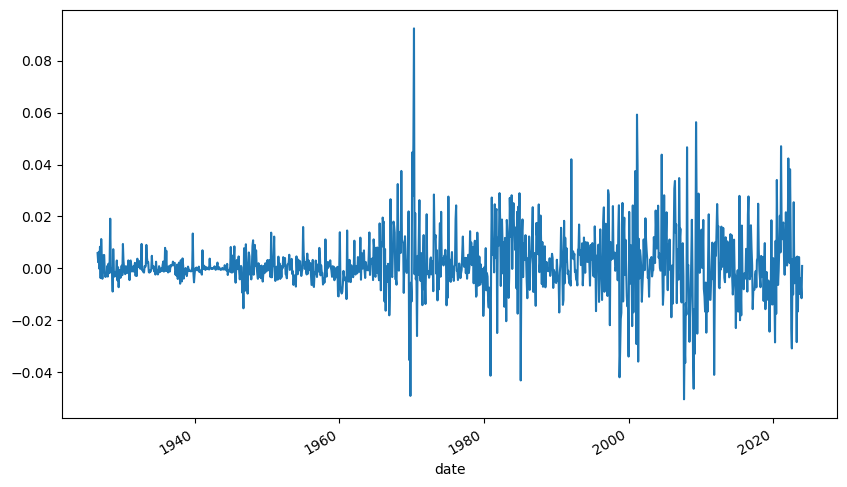

In [20]:
gamma_beme.beme.plot()

#### What is the problem? 

In [21]:
fdata.dropna(subset=['mesum', 'beme', 'opbe', 'inv'], inplace = True)

<Axes: xlabel='date'>

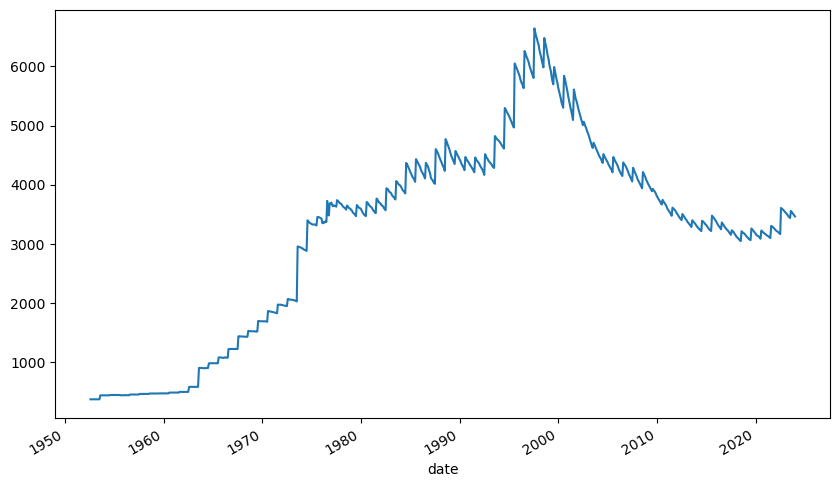

In [22]:
fdata.groupby('date').count().rankyear.plot()

In [23]:
fdata = fdata[fdata.rankyear>=1963]

#### Try to run the FM regression again!

In [24]:
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + beme'))
gamma_beme.head()

,Intercept,beme
date,,
1963-07-31,-0.006559,-0.004590
1963-08-30,0.050975,-0.005010
1963-09-30,-0.029356,0.009147
1963-10-31,0.009544,0.005235
1963-11-29,-0.011189,-0.000489


<Axes: xlabel='date'>

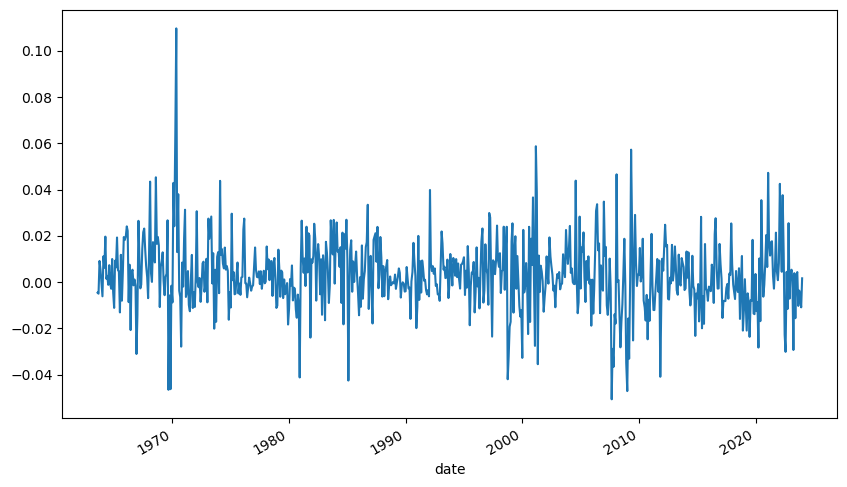

In [25]:
gamma_beme.beme.plot()

In [26]:
# Fama-Macbeth regressions results
fm_summary(gamma_beme)

,mean,std_error,tstat
Intercept,0.005469,0.002254,2.426154
beme,0.003087,0.000562,5.492988


**What's the problem (again)?**

<Axes: >

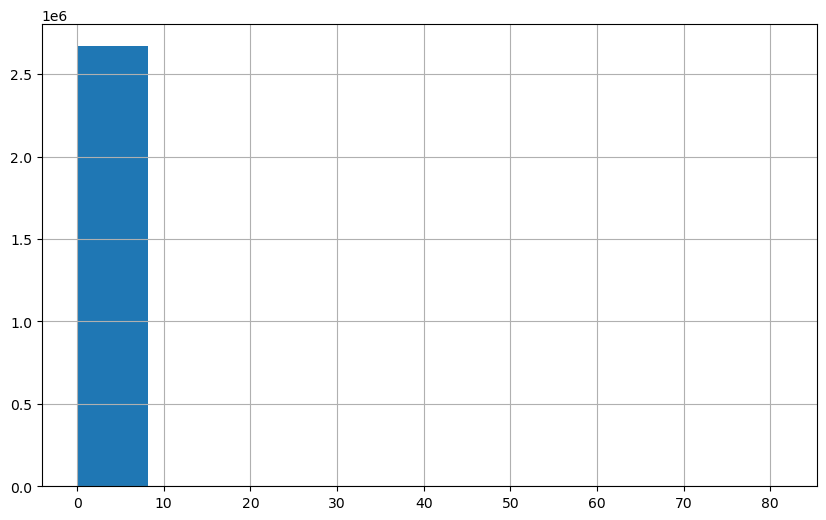

In [27]:
fdata.beme.hist()

<Axes: xlabel='date'>

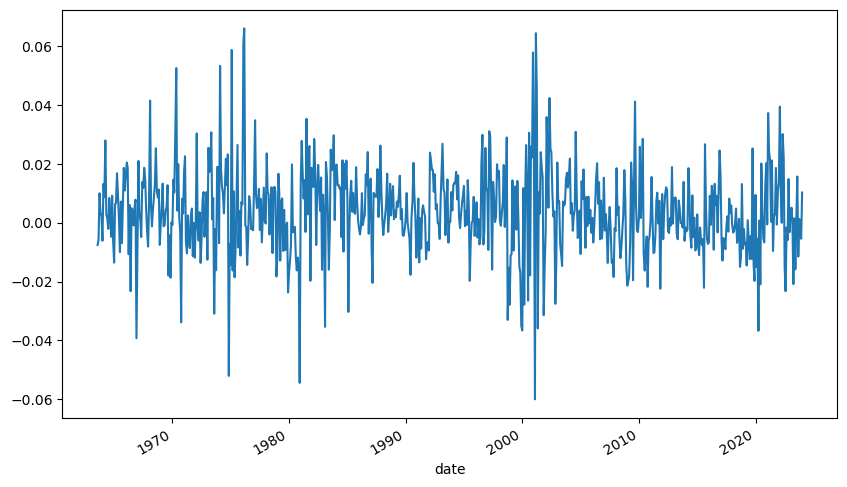

In [28]:
# Try log 
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(beme)'))
gamma_beme['np.log(beme)'].plot()

In [29]:
# Fama-Macbeth regressions results
fm_summary(gamma_beme)

,mean,std_error,tstat
Intercept,0.009736,0.002115,4.603487
np.log(beme),0.003675,0.000542,6.777646


#### Is Value dead?

In [30]:
fm_summary(gamma_beme.loc['2010-01-01':])

,mean,std_error,tstat
Intercept,0.009985,0.004642,2.151301
np.log(beme),0.000931,0.000936,0.994772


In [31]:
fm_summary(gamma_beme.loc[:'2006-12-31'])

,mean,std_error,tstat
Intercept,0.010684,0.002359,4.529733
np.log(beme),0.004903,0.000667,7.349763


### Does size forcast future returns?

<Axes: xlabel='date'>

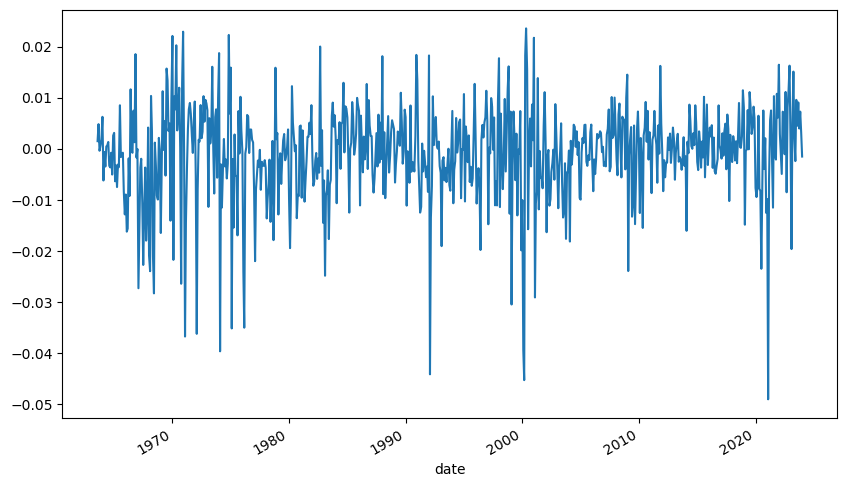

In [32]:
gamma_me = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(mesum)'))
gamma_me['np.log(mesum)'].plot()

In [33]:
# Fama-Macbeth regressions results
fm_summary(gamma_me) 

,mean,std_error,tstat
Intercept,0.018659,0.005242,3.559830
np.log(mesum),-0.000988,0.000344,-2.870389


#### What happened to Size factor?

In [34]:
fm_summary(gamma_me['2010-01-01':]) 

,mean,std_error,tstat
Intercept,0.002686,0.010339,0.259811
np.log(mesum),0.000470,0.000586,0.801497


In [35]:
fm_summary(gamma_me[:'2006-12-31'])

,mean,std_error,tstat
Intercept,0.025870,0.006292,4.111604
np.log(mesum),-0.001569,0.000428,-3.663255


### What about Fama and French 2015?

In [36]:
gamma_f5 = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(mesum)+ np.log(beme) + opbe + inv'))
gamma_f5.head()

,Intercept,np.log(mesum),np.log(beme),opbe,inv
date,,,,,
1963-07-31,-0.014215,0.000114,-0.007562,0.000666,-0.003754
1963-08-30,-0.006858,0.004742,-0.000159,0.002730,-0.004594
1963-09-30,-0.036090,0.001683,0.011904,0.003427,-0.010557
1963-10-31,-0.008050,0.001757,0.007862,0.018836,0.001823
1963-11-29,-0.036509,0.002485,0.004464,0.002897,-0.027017


<Axes: xlabel='date'>

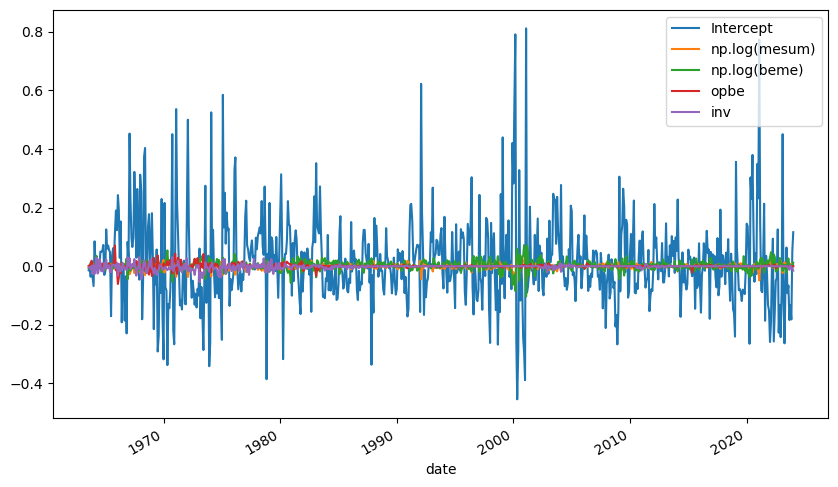

In [37]:
gamma_f5.plot()

In [38]:
fm_summary(gamma_f5)

,mean,std_error,tstat
Intercept,0.016464,0.005442,3.025617
np.log(mesum),-0.000662,0.000372,-1.778075
np.log(beme),0.002814,0.000600,4.688734
opbe,0.000487,0.000277,1.759012
inv,-0.001874,0.000318,-5.894593


In [39]:
fm_summary(gamma_f5[:'2006-12-31']) 

,mean,std_error,tstat
Intercept,0.023823,0.006591,3.614765
np.log(mesum),-0.001217,0.000465,-2.617052
np.log(beme),0.003428,0.000745,4.604512
opbe,0.000623,0.000380,1.636796
inv,-0.002412,0.000435,-5.541250


## Long-short portfolio

### How to Construct a "Factor"?
<img src="ff6.png" width="800" height="400">

### Sort Portfolio

In [40]:
port = sort_portfolios(data = fdata,
                       quantiles={'mesum': [0.5],
                                  'beme': [0.3, 0.7],
                                  'opbe': [0.3, 0.7],
                                  'inv': [0.3, 0.7]},
                       id_variables=['rankyear', 'permno', 'exchcd'],
                       exch_cd=[1])  

NYSE breakpoints were calculated for mesum.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for beme.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for opbe.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for inv.
Stocks were sorted according to breakpoints, starting in 1963


Look at the data.

In [41]:
port.head()

,rankyear,permno,invportfolio,opbeportfolio,bemeportfolio,mesumportfolio
0,1963,10006.0,inv1,opbe1,beme3,mesum2
1,1963,10014.0,inv2,opbe1,beme3,mesum1
2,1963,10102.0,inv3,opbe2,beme2,mesum2
3,1963,10137.0,inv2,opbe3,beme1,mesum2
4,1963,10145.0,inv3,opbe2,beme2,mesum2


In [42]:
port.groupby(['rankyear','mesumportfolio']).mesumportfolio.count()

rankyear  mesumportfolio
1963      mesum1             524
          mesum2             382
1964      mesum1             595
          mesum2             391
1965      mesum1             669
                            ... 
2021      mesum2             928
2022      mesum1            2661
          mesum2             955
2023      mesum1            2628
          mesum2             933
Name: mesumportfolio, Length: 122, dtype: int64

### Portfolio returns

#### Merge data

In [43]:
port_ret = pd.merge(fdata[['permno', 'date', 'rankyear', 'exret', 'retadj', 'lag_me', 'ticker', 'conm', 'rf']], 
                port,
                on = ['permno', 'rankyear']) 

Have a look at Apple in 2019. Which portfolio did Apple belong to?

In [44]:
port_ret[(port_ret.ticker=='AAPL') & (port_ret.date=='2019-01-31')]

,permno,date,rankyear,exret,retadj,lag_me,ticker,conm,rf,invportfolio,opbeportfolio,bemeportfolio,mesumportfolio
287810,14593,2019-01-31,2018,0.053234,0.055154,746079.172518,AAPL,APPLE INC,0.00192,inv3,opbe3,beme1,mesum2


In [45]:
port_ret[(port_ret.ticker=='AAPL') & (port_ret.date=='2020-01-31')]

,permno,date,rankyear,exret,retadj,lag_me,ticker,conm,rf,invportfolio,opbeportfolio,bemeportfolio,mesumportfolio
287822,14593,2020-01-31,2019,0.052846,0.05401,1.287643e+06,AAPL,APPLE INC,0.001164,inv1,opbe3,beme1,mesum2


#### Calculate returns

In [46]:
beme_ret = port_ret.groupby(['date', 'mesumportfolio', 'bemeportfolio']).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))

In [47]:
beme_ret

date        mesumportfolio  bemeportfolio
1963-07-31  mesum1          beme1           -0.008538
                            beme2           -0.009547
                            beme3           -0.016721
            mesum2          beme1            0.001260
                            beme2            0.004718
                                               ...   
2023-12-29  mesum1          beme2            0.128090
                            beme3            0.154191
            mesum2          beme1            0.041937
                            beme2            0.053666
                            beme3            0.112328
Length: 4356, dtype: float64

In [48]:
beme_ret = beme_ret.unstack(level=[1, 2])
beme_ret

mesumportfolio    mesum1                        mesum2                    
bemeportfolio      beme1     beme2     beme3     beme1     beme2     beme3
date                                                                      
1963-07-31     -0.008538 -0.009547 -0.016721  0.001260  0.004718 -0.012421
1963-08-30      0.058752  0.049112  0.054417  0.054961  0.046401  0.076299
1963-09-30     -0.037228 -0.012831 -0.017964 -0.015183 -0.006918 -0.004640
1963-10-31      0.009547  0.015880  0.034698  0.045328  0.016143  0.028257
1963-11-29     -0.023892 -0.014601 -0.002550 -0.011891  0.004552 -0.011355
...                  ...       ...       ...       ...       ...       ...
2023-08-31     -0.074818 -0.045804 -0.057533 -0.008289 -0.029844 -0.056272
2023-09-29     -0.065773 -0.063241 -0.070214 -0.055348 -0.027161 -0.029599
2023-10-31     -0.086051 -0.064810 -0.070109 -0.018964 -0.036180 -0.044256
2023-11-30      0.110800  0.086423  0.107857  0.096539  0.076600  0.123550
2023-12-29      0.118932  0.128090  0.154191  0.041937  0.053666  0.112328

[726 rows x 6 columns]

<Axes: xlabel='date'>

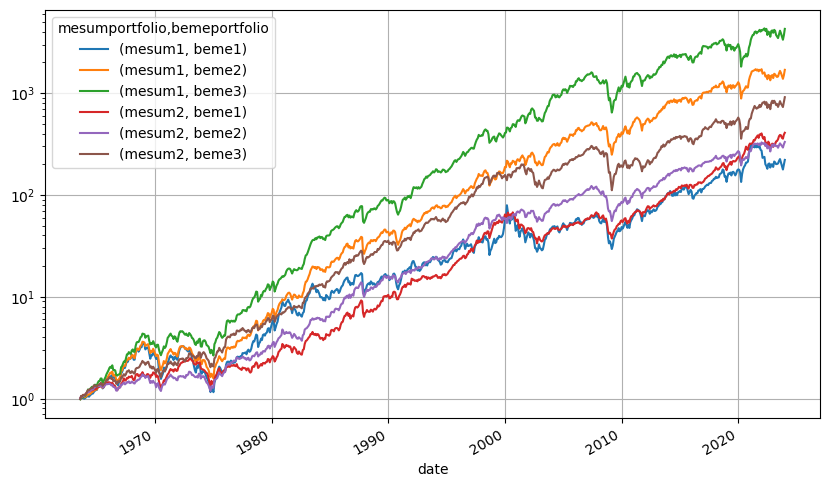

In [49]:
(1+beme_ret).cumprod().plot(grid=True, logy=True)

In [50]:
# HML returns
beme_ret['hml'] = beme_ret.loc[:, idx[:, 'beme3']].mean(axis=1) - beme_ret.loc[:, idx[:, 'beme1']].mean(axis=1)

In [51]:
rf_data = mdata.loc[(mdata.date >= '1963-07-01') , ['date','rf']].drop_duplicates()
rf_data.set_index('date', inplace = True)

<Axes: xlabel='date'>

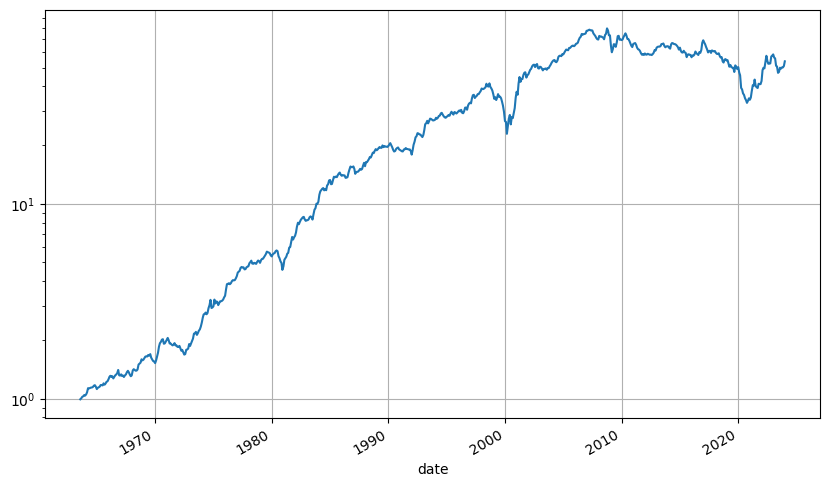

In [52]:
(1+beme_ret['hml'].add(rf_data['rf'], axis = 'index')).cumprod().plot(grid=True, logy = True)

In [ ]:
# Characteristic: beme
# --------------------
charvars = ['mesum', 'beme']
beme_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
beme_ret = beme_ret.unstack(level=[1, 2])
beme_ret['hml'] = beme_ret.loc[:, idx[:, 'beme3']].mean(axis=1) - beme_ret.loc[:, idx[:, 'beme1']].mean(axis=1)

In [54]:
# Characteristic: op
# -------------------
charvars = ['mesum', 'opbe']
op_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
op_ret = op_ret.unstack(level=[1, 2])
op_ret['rmw'] = op_ret.loc[:, idx[:, 'opbe3']].mean(axis=1) - op_ret.loc[:, idx[:, 'opbe1']].mean(axis=1)
del charvars

In [55]:
# Characteristic: inv
# -------------------
charvars = ['mesum', 'inv']
inv_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
inv_ret = inv_ret.unstack(level=[1, 2])
inv_ret['cma'] = inv_ret.loc[:, idx[:, 'inv1']].mean(axis=1) - inv_ret.loc[:, idx[:, 'inv3']].mean(axis=1)
del charvars

In [56]:
inv_ret

mesumportfolio    mesum1                        mesum2                      \
invportfolio        inv1      inv2      inv3      inv1      inv2      inv3   
date                                                                         
1963-07-31     -0.018541 -0.013862 -0.003078 -0.012528  0.004541  0.004152   
1963-08-30      0.048955  0.046819  0.063307  0.061669  0.049925  0.053848   
1963-09-30     -0.011989 -0.020595 -0.027963 -0.016715 -0.009981 -0.010115   
1963-10-31      0.017921  0.017541  0.028831  0.023777  0.015821  0.063848   
1963-11-29     -0.007312 -0.012075 -0.017028  0.003895  0.001684 -0.020874   
...                  ...       ...       ...       ...       ...       ...   
2023-08-31     -0.073574 -0.054115 -0.046463 -0.012626 -0.013293 -0.023456   
2023-09-29     -0.076309 -0.056541 -0.064701 -0.055441 -0.046493 -0.043282   
2023-10-31     -0.083656 -0.049219 -0.081656 -0.038444 -0.026388 -0.014863   
2023-11-30      0.114406  0.089132  0.095470  0.086860  0.083086  0.112095   
2023-12-29      0.147943  0.116239  0.133632  0.073454  0.044844  0.042349   

mesumportfolio       cma  
invportfolio              
date                      
1963-07-31     -0.016071  
1963-08-30     -0.003265  
1963-09-30      0.004687  
1963-10-31     -0.025490  
1963-11-29      0.017243  
...                  ...  
2023-08-31     -0.008140  
2023-09-29     -0.011884  
2023-10-31     -0.012790  
2023-11-30     -0.003150  
2023-12-29      0.022708  

[726 rows x 7 columns]

In [57]:
# Characteristic: size
# --------------------
fret = pd.DataFrame()
fret['smb'] = (beme_ret.loc[:, 'mesum1'].mean(axis=1) - beme_ret.loc[:,'mesum2'].mean(axis=1) +
               op_ret.loc[:, 'mesum1'].mean(axis=1) - op_ret.loc[:,'mesum2'].mean(axis=1) +
               inv_ret.loc[:, 'mesum1'].mean(axis=1) - inv_ret.loc[:,'mesum2'].mean(axis=1))*(1/3)

In [58]:
# %% Aggregate all
beme_ret.columns = [''.join(col).strip() for col in beme_ret.columns.values]
op_ret.columns = [''.join(col).strip() for col in op_ret.columns.values]
inv_ret.columns = [''.join(col).strip() for col in inv_ret.columns.values]

In [59]:
fret = fret.join(beme_ret[['hml']]).join(op_ret[['rmw']]).join(inv_ret[['cma']])

In [60]:
fret  

,smb,hml,rmw,cma
date,,,,
1963-07-31,-0.010490,-0.010932,0.007197,-0.016071
1963-08-30,-0.002377,0.008502,0.003703,-0.003265
1963-09-30,-0.010100,0.014904,-0.007293,0.004687
1963-10-31,-0.009475,0.004040,0.029230,-0.025490
1963-11-29,-0.006030,0.010939,0.000516,0.017243
...,...,...,...,...
2023-08-31,-0.033555,-0.015349,0.037309,-0.008140
2023-09-29,-0.020030,0.010654,0.023952,-0.011884
2023-10-31,-0.042569,-0.004675,0.025165,-0.012790


<Axes: xlabel='date'>

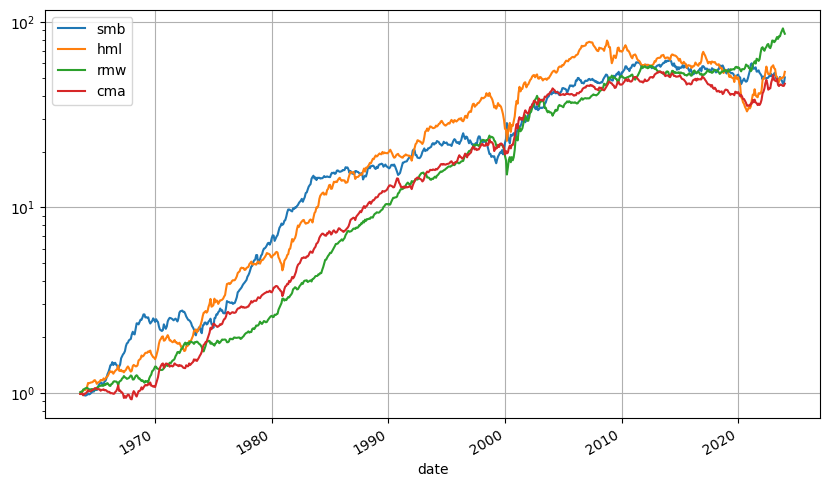

In [61]:
(1+fret.add(rf_data['rf'], axis = 'index')).cumprod().plot(grid=True, logy = True)

### Average Returns

In [62]:
fret.mean()*100*12

smb    2.669997
hml    2.844233
rmw    3.360484
cma    2.315510
dtype: float64

### Compare Sharpe-ratio

In [63]:
(fret.mean()/fret.std())*np.sqrt(12)

smb    0.258894
hml    0.264518
rmw    0.423762
cma    0.301235
dtype: float64